# Football Data Cleaning and Exploration

## Import libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import os
import kagglehub

## Import data

In [58]:
!pip install kagglehub --quiet

In [59]:
path = kagglehub.dataset_download(
    "martj42/international-football-results-from-1872-to-2017"
)
print("Path to dataset files:", path)

Path to dataset files: /home/sagemaker-user/.cache/kagglehub/datasets/martj42/international-football-results-from-1872-to-2017/versions/98


In [60]:
results_path = os.path.join(path, "results.csv")
df = pd.read_csv(results_path, parse_dates=["date"])
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Data exploration

In [61]:
print("Data Shape", df.shape)
print("-------------------------")
print("First 5 Rows", df.head())
print("-------------------------")
print("Last 5 rows", df.tail()) 
print("-------------------------")
print("Data Information", df.info())
print("-------------------------")
print("Describe Table", df.describe()) 
print("-------------------------")
print("Unique Columns", df.nunique()) 

Data Shape (48532, 9)
-------------------------
First 5 Rows         date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
-------------------------
Last 5 rows             date               home_team away_team  home_score  away_score  \
48527 2025-09-09  Bosnia and Herzegovina   Austria           1           2   
48528 2025-09-09                  Cyprus   Romania           2           2   
48529 2025-09-09                  Norway   Moldo

### Check for missing & duplicate data

In [62]:
print("Null values", df.isnull().sum())                
print("Duplicate values", df.duplicated().sum())

Null values date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64
Duplicate values 0


## Verify data columns of interest

In [63]:
df['tournament'].value_counts().head(10)

tournament
Friendly                                18116
FIFA World Cup qualification             8529
UEFA Euro qualification                  2824
African Cup of Nations qualification     2278
FIFA World Cup                            964
Copa América                              869
AFC Asian Cup qualification               794
African Cup of Nations                    793
UEFA Nations League                       658
CECAFA Cup                                620
Name: count, dtype: int64

In [64]:
df['home_team'].value_counts().head(10)

home_team
Brazil           608
Argentina        598
Mexico           592
Germany          550
South Korea      545
England          544
France           534
Sweden           529
Hungary          493
United States    491
Name: count, dtype: int64

In [65]:
df['away_team'].value_counts().head(10)

away_team
Uruguay        578
Sweden         564
England        538
Hungary        505
Paraguay       489
Germany        473
Argentina      461
Poland         460
Zambia         454
South Korea    454
Name: count, dtype: int64

### Create Columns for Result, Winning Type and Year

In [66]:
df["result"] = df.apply(
    lambda x: "Home Win" if x.home_score > x.away_score
              else "Away Win" if x.home_score < x.away_score
              else "Draw", axis=1
)
df["goal_diff"] = df["home_score"] - df["away_score"]
df["year"] = df["date"].dt.year

In [67]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,goal_diff,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Home Win,2,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Home Win,1,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Home Win,3,1876
...,...,...,...,...,...,...,...,...,...,...,...,...
48527,2025-09-09,Bosnia and Herzegovina,Austria,1,2,FIFA World Cup qualification,Zenica,Bosnia and Herzegovina,False,Away Win,-1,2025
48528,2025-09-09,Cyprus,Romania,2,2,FIFA World Cup qualification,Nicosia,Cyprus,False,Draw,0,2025
48529,2025-09-09,Norway,Moldova,11,1,FIFA World Cup qualification,Oslo,Norway,False,Home Win,10,2025
48530,2025-09-09,Albania,Latvia,1,0,FIFA World Cup qualification,Tirana,Albania,False,Home Win,1,2025


### Graphs

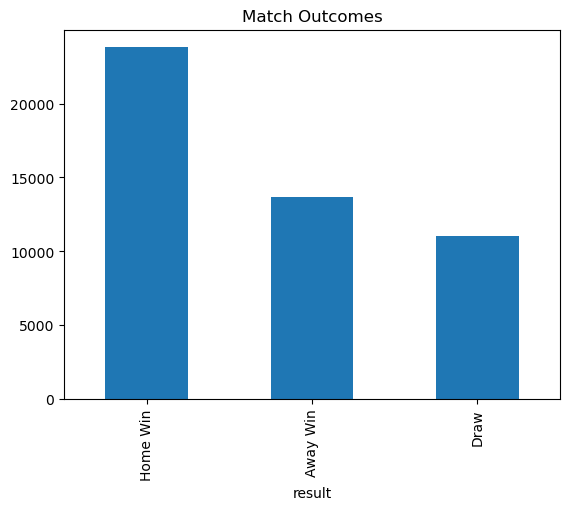

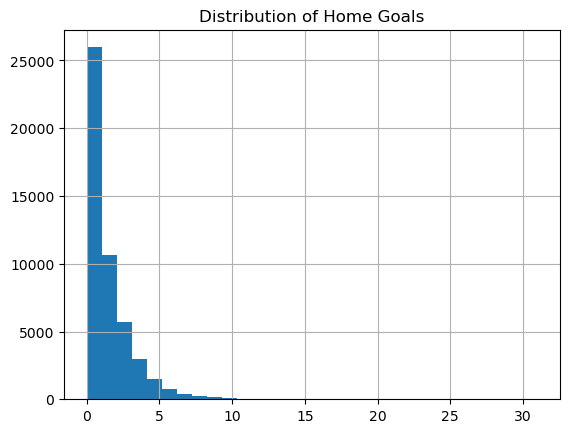

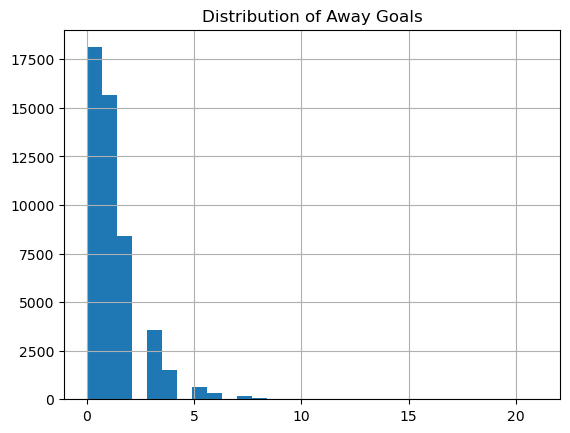

In [68]:
df["result"].value_counts().plot(kind="bar", title="Match Outcomes")
plt.show()

df["home_score"].hist(bins=30)
plt.title("Distribution of Home Goals")
plt.show()

df["away_score"].hist(bins=30)
plt.title("Distribution of Away Goals")
plt.show()

### Tren 

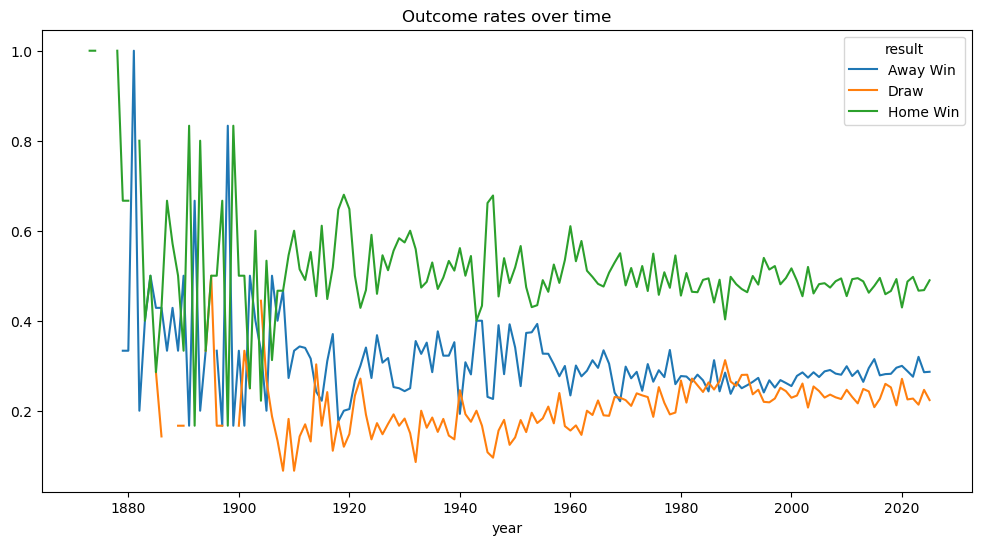

In [70]:
df.groupby("year")["result"].value_counts(normalize=True).unstack().plot(
    kind="line", figsize=(12,6), title="Outcome rates over time"
)
plt.show()

In [71]:
home_win_rate = (df["home_score"] > df["away_score"]).mean()
print("Overall home win rate:", round(home_win_rate, 2))

Overall home win rate: 0.49


### Save data for the next step

In [72]:
# 1) save locally first
os.makedirs("data", exist_ok=True)
df.to_csv("data/results_clean_data.csv", index=False)

# 2) use SageMaker's default bucket
sess   = sagemaker.Session()
bucket = sess.default_bucket()          
print("Using bucket:", bucket)

# 3) upload to S3 via SageMaker helper
s3_uri = sess.upload_data(
    path="data/results_clean_data.csv",
    bucket=bucket,
    key_prefix="football"                
)
print("Uploaded to:", s3_uri)

Using bucket: sagemaker-us-east-1-851725470355
Uploaded to: s3://sagemaker-us-east-1-851725470355/football/results_clean_data.csv


In [73]:
import sagemaker
sess = sagemaker.Session()
print(sess.default_bucket())

sagemaker-us-east-1-851725470355


In [74]:
s3_uri = "s3://sagemaker-us-east-1-851725470355/football/results_clean_data.csv"
df = pd.read_csv(s3_uri, parse_dates=["date"])
df.head(), df.shape

(        date home_team away_team  home_score  away_score tournament     city  \
 0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
 1 1873-03-08   England  Scotland           4           2   Friendly   London   
 2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
 3 1875-03-06   England  Scotland           2           2   Friendly   London   
 4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
 
     country  neutral    result  goal_diff  year  
 0  Scotland    False      Draw          0  1872  
 1   England    False  Home Win          2  1873  
 2  Scotland    False  Home Win          1  1874  
 3   England    False      Draw          0  1875  
 4  Scotland    False  Home Win          3  1876  ,
 (48532, 12))

In [75]:
PROJECT = "football"
BUCKET  = "sagemaker-us-east-1-851725470355"
RAW_URI     = f"s3://{BUCKET}/{PROJECT}/raw/"
CLEAN_URI   = f"s3://{BUCKET}/{PROJECT}/processed/results_clean.parquet"
FEATS_URI   = f"s3://{BUCKET}/{PROJECT}/processed/features.parquet"
MODEL_PREFIX= f"{PROJECT}/models/"  # used by SageMaker training jobs


In [76]:
def make_features(df, n=5):
    df = df.copy().sort_values("date")

    # target
    df["y"] = (df["home_score"] > df["away_score"]).astype(int)

    for side in ["home", "away"]:
        team = f"{side}_team"
        gf   = f"{side}_score"
        ga   = "away_score" if side == "home" else "home_score"

        # rolling goals for/against
        df[f"{side}_gf_roll"] = (
            df.groupby(team)[gf]
              .rolling(n, min_periods=1).mean()
              .reset_index(level=0, drop=True)
        )
        df[f"{side}_ga_roll"] = (
            df.groupby(team)[ga]
              .rolling(n, min_periods=1).mean()
              .reset_index(level=0, drop=True)
        )

        # make an explicit win column, then roll on *that* column
        win_col = f"{side}_win"
        df[win_col] = (df[gf] > df[ga]).astype(int)
        df[f"{side}_winrate_roll"] = (
            df.groupby(team)[win_col]
              .rolling(n, min_periods=1).mean()
              .reset_index(level=0, drop=True)
        )

    # extras
    if "neutral" in df.columns:
        df["is_neutral"] = df["neutral"].astype(int)
    df["goal_diff"] = df["home_score"] - df["away_score"]
    return df

In [77]:
!pip install -q pyarrow
df.to_parquet(CLEAN_URI, index=False)
print("Wrote:", CLEAN_URI)

Wrote: s3://sagemaker-us-east-1-851725470355/football/processed/results_clean.parquet
